# Lab 12
**SID: 11912725**
**Name: 周民涛**

In [10]:
import matplotlib.pyplot as plt
import numpy as np

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


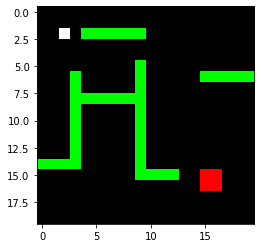

In [11]:
map_matrix = np.load("lab12_map_matrix.npy")
plt.imshow(map_matrix)
plt.show()

In [12]:
map_matrix

array([[[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [255., 255., 255.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       ...,

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,  

In [13]:
# map_matrix
# map_matrix.shape # (20,20,3)
height = map_matrix.shape[0]
width = map_matrix.shape[1]
start_rgb = (255, 255, 255)
obstacle_rgb = (0, 30, 0)
goal_rgb = (255, 0, 0)
start_indices = np.argwhere(np.all(map_matrix == start_rgb, axis=-1))
obstacle_indices = np.argwhere(np.all(map_matrix == obstacle_rgb, axis=-1))
goal_indices = np.argwhere(np.all(map_matrix == goal_rgb, axis=-1))

dx = [0, 1, 0, -1]
dy = [1, 0, -1, 0]
actions = [0, 1, 2, 3]
states = [(x, y) for x in range(height) for y in range(width)]
gamma = 0.8
theta = 0.0001

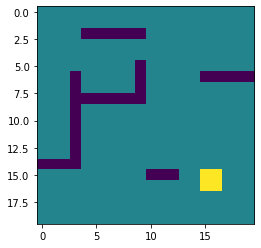

In [14]:
reward_matrix = np.load('lab12_reward_matrix.npy')
plt.imshow(reward_matrix)
plt.show()

In [15]:
# reward_matrix
reward_matrix.shape  # (20,20)

(20, 20)

In [16]:
v = np.zeros_like(reward_matrix)
policy = np.zeros_like(reward_matrix, dtype=int)

while True:
    delta = 0
    for s in states:
        best_action_value = -np.inf
        best_action = -1
        x, y = s
        for action in actions:
            new_x = x + dx[action]
            new_y = y + dy[action]
            if 0 <= new_x < height and 0 <= new_y < width:
                value = reward_matrix[x][y] + gamma * v[new_x, new_y]
                if best_action_value < value:
                    best_action_value = value
                    best_action = action
        action = policy[x][y]
        new_x = x + dx[action]
        new_y = y + dy[action]
        if 0 <= new_x < height and 0 <= new_y < width and best_action_value <= reward_matrix[x][y] + gamma * v[
            new_x, new_y]:
            continue
        policy[x][y] = best_action
        if delta < np.abs(best_action_value - v[s]):
            delta = np.abs(best_action_value - v[s])
    for s in states:
        x, y = s
        action = policy[x][y]
        new_x = x + dx[action]
        new_y = y + dy[action]
        if 0 <= new_x < height and 0 <= new_y < width:
            v[x][y] = reward_matrix[x][y] + gamma * v[new_x, new_y]
        else:
            v[x][y] = -np.inf
    if delta < theta:
        break

next_index = list(start_indices[0])
while next_index not in goal_indices.tolist():
    map_matrix[next_index[0], next_index[1], :] = 255
    action = policy[next_index[0], next_index[1]]
    next_index[0] += dx[action]
    next_index[1] += dy[action]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


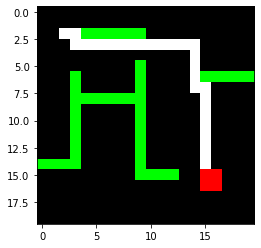

In [17]:
# print the shortest path

plt.imshow(map_matrix)
plt.show()

## Questions
1. In Reinforcement Learning (RL), the problem to resolve is described as a Markov Decision Process (MDP). Theoretical results in RL rely on the MDP description being a correct match to the problem. If your problem is well described as a MDP, then RL may be a good framework to use to find solutions.
2. The two required properties of dynamic programming are:
    * Optimal substructure: optimal solution of the sub-problem can be used to solve the overall problem.
    * Overlapping sub-problems: sub-problems recur many times. Solutions of sub-problems can be cached and reused.
When the problem dosen't have such conditions, the MDP methods performs poorly.

3. If the conditions of the second question are satisfied and the problem is a  Markov process.